In [17]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://zenodo.org/record/6199560/files/default.csv'
data = pd.read_csv(url)

In [7]:
# Printing entire dataframe
print(data)

      Unnamed: 0 default student      balance        income
0              1      No      No   729.526495  44361.625074
1              2      No     Yes   817.180407  12106.134700
2              3      No      No  1073.549164  31767.138947
3              4      No      No   529.250605  35704.493935
4              5      No      No   785.655883  38463.495879
...          ...     ...     ...          ...           ...
9995        9996      No      No   711.555020  52992.378914
9996        9997      No      No   757.962918  19660.721768
9997        9998      No      No   845.411989  58636.156984
9998        9999      No      No  1569.009053  36669.112365
9999       10000      No     Yes   200.922183  16862.952321

[10000 rows x 5 columns]


In [18]:
# Getting individual arrays
defaults = data["default"]
balance  = data["balance"]
#print(defaults)
#print(balance)

In [11]:
# Turning defaults into an array of binary values
# Turns out to be unecessary
defaultsBinary = np.ones(len(defaults))
for i in range(len(defaults)):
    if(defaults[i] == "No"):
        defaultsBinary[i] = 0

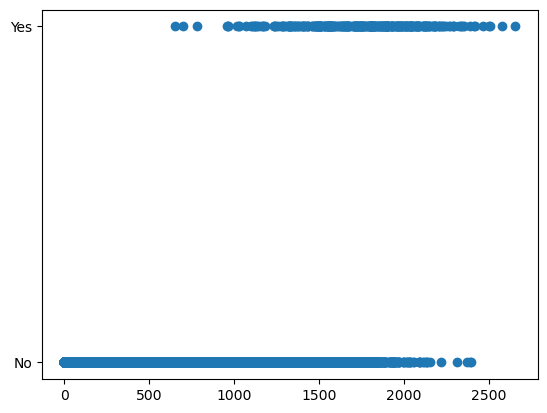

In [16]:
# Plotting
plt.scatter(balance,defaults)
plt.show()

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01633333 0.01633333
 0.01633333 0.         0.         0.049      0.049      0.03266667
 0.11433333 0.06533333 0.11433333 0.22866667 0.17966667 0.16333333
 0.37566667 0.392      0.21233333 0.27766667 0.40833333 0.47366667
 0.37566667 0.343      0.31033333 0.37566667 0.245      0.196
 0.13066667 0.08166667 0.08166667 0.03266667 0.049      0.
 0.01633333 0.01633333 0.         0.         0.         0.
 0.        ]


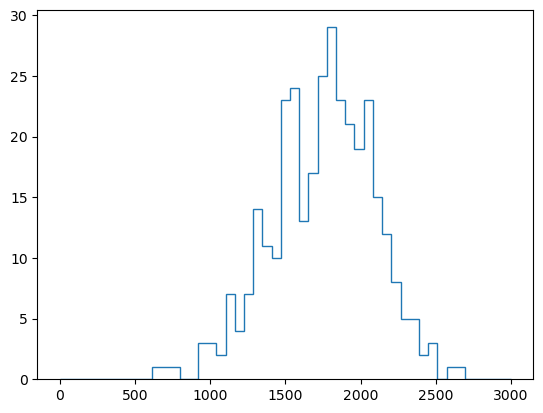

In [97]:
# Getting the parts of the dataframe with yes and no
df_yes = data[data["default"] == "Yes"]
df_no = data[data["default"] == "No"]

# Generating histogram
balanceBins = np.linspace(0,3000,50)
balanceHist = np.histogram(df_yes["balance"],bins = balanceBins)
peoplePerBin = balanceBins[1]
balanceRatios = balanceHist[0]/peoplePerBin
print(balanceRatios)
    

# Plotting
plt.stairs(balanceHist[0],balanceHist[1])
plt.show()

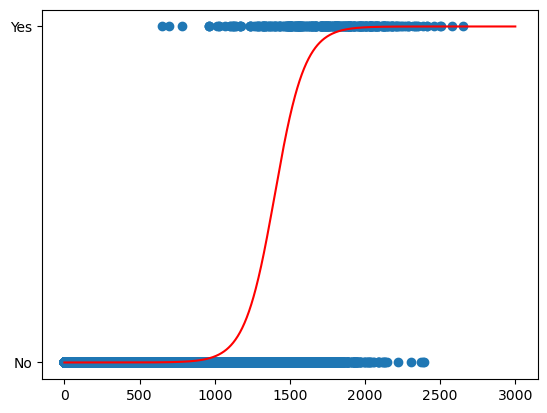

In [73]:
# Tried many times!!
beta0 = -14
beta1 = 0.01

# Defining function
def f(x):
    return np.exp(beta0 + beta1*x)/ (1 + np.exp(beta0 + beta1*x))

# Calculating function values
X = np.linspace(0,3000,1000)
Y = f(X)

# Plotting
plt.scatter(balance,defaults)
plt.plot(X,Y,color = "red")
plt.show()

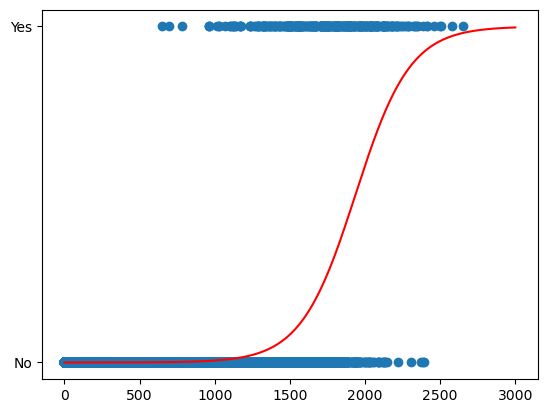

In [98]:
x = np.array(balance).reshape(-1,1)
y = defaults


# Time for regression for real!!
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
fit = regressor.fit(x, defaults)

beta0 = regressor.intercept_
beta1 = regressor.coef_

# Defining function
def f(x):
    return np.exp(beta0 + beta1*x)/ (1 + np.exp(beta0 + beta1*x))

# Calculating function values
X = np.linspace(0,3000,1000)
Y = f(X)

# Plotting
plt.scatter(balance,defaults)
plt.plot(X,Y[0],color = "red")
plt.show()